<a href="https://colab.research.google.com/github/samarthya04/IIIT-A-internship/blob/main/Online_Retail_2_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [51]:
path = '/content/drive/MyDrive/IIIT-A-Internship/Online Retail 2/online_retail_II.csv'
df = pd.read_csv(path)

In [52]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [54]:
df = df[df['Country']=='United Kingdom']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [55]:
df = df[['Invoice', 'StockCode', 'Quantity', 'Price', 'InvoiceDate', 'Customer ID']]
df

,Invoice,StockCode,Quantity,Price,InvoiceDate,Customer ID
0,489434,85048,12,6.95,2009-12-01 07:45:00,13085.0
1,489434,79323P,12,6.75,2009-12-01 07:45:00,13085.0
2,489434,79323W,12,6.75,2009-12-01 07:45:00,13085.0
3,489434,22041,48,2.10,2009-12-01 07:45:00,13085.0
4,489434,21232,24,1.25,2009-12-01 07:45:00,13085.0
...,...,...,...,...,...,...
1067350,581585,22466,12,1.95,2011-12-09 12:31:00,15804.0
1067351,581586,22061,8,2.95,2011-12-09 12:49:00,13113.0
1067352,581586,23275,24,1.25,2011-12-09 12:49:00,13113.0
1067353,581586,21217,24,8.95,2011-12-09 12:49:00,13113.0


In [56]:
df['Amount'] = df.iloc[:, 2] * df.iloc[:, 3]
df.drop(['Quantity', 'Price'], axis=1, inplace=True)
df

<ipython-input-56-8cb06b9baf5f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-8cb06b9baf5f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Invoice,StockCode,InvoiceDate,Customer ID,Amount
0,489434,85048,2009-12-01 07:45:00,13085.0,83.4
1,489434,79323P,2009-12-01 07:45:00,13085.0,81.0
2,489434,79323W,2009-12-01 07:45:00,13085.0,81.0
3,489434,22041,2009-12-01 07:45:00,13085.0,100.8
4,489434,21232,2009-12-01 07:45:00,13085.0,30.0
...,...,...,...,...,...
1067350,581585,22466,2011-12-09 12:31:00,15804.0,23.4
1067351,581586,22061,2011-12-09 12:49:00,13113.0,23.6
1067352,581586,23275,2011-12-09 12:49:00,13113.0,30.0
1067353,581586,21217,2011-12-09 12:49:00,13113.0,214.8


In [57]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed', dayfirst=True)
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time

df.drop(['InvoiceDate'], axis=1, inplace=True)
df

<ipython-input-57-67e87bf39c60>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-57-67e87bf39c60>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-57-67e87bf39c60>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-57-67e87bf

,Invoice,StockCode,Customer ID,Amount,Date,Time
0,489434,85048,13085.0,83.4,2009-12-01,07:45:00
1,489434,79323P,13085.0,81.0,2009-12-01,07:45:00
2,489434,79323W,13085.0,81.0,2009-12-01,07:45:00
3,489434,22041,13085.0,100.8,2009-12-01,07:45:00
4,489434,21232,13085.0,30.0,2009-12-01,07:45:00
...,...,...,...,...,...,...
1067350,581585,22466,15804.0,23.4,2011-12-09,12:31:00
1067351,581586,22061,13113.0,23.6,2011-12-09,12:49:00
1067352,581586,23275,13113.0,30.0,2011-12-09,12:49:00
1067353,581586,21217,13113.0,214.8,2011-12-09,12:49:00


In [58]:
df = df[df['Amount'] > 0]

In [59]:
df = df[df['Customer ID'].notnull()]
df

,Invoice,StockCode,Customer ID,Amount,Date,Time
0,489434,85048,13085.0,83.4,2009-12-01,07:45:00
1,489434,79323P,13085.0,81.0,2009-12-01,07:45:00
2,489434,79323W,13085.0,81.0,2009-12-01,07:45:00
3,489434,22041,13085.0,100.8,2009-12-01,07:45:00
4,489434,21232,13085.0,30.0,2009-12-01,07:45:00
...,...,...,...,...,...,...
1067350,581585,22466,15804.0,23.4,2011-12-09,12:31:00
1067351,581586,22061,13113.0,23.6,2011-12-09,12:49:00
1067352,581586,23275,13113.0,30.0,2011-12-09,12:49:00
1067353,581586,21217,13113.0,214.8,2011-12-09,12:49:00


In [60]:
df['Date'] = pd.to_datetime(df['Date'])
recent_date = df['Date'].max()
df_recency = df.groupby('Customer ID')['Date'].max().reset_index()
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
df_recency['Recency'] = (recent_date - df_recency['LastPurchaseDate']).dt.days
df_recency

<ipython-input-60-d616b90287e9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12608.0,2010-10-31,404
2,12745.0,2010-08-10,486
3,12746.0,2010-06-17,540
4,12747.0,2011-12-07,2
...,...,...,...
5345,18283.0,2011-12-06,3
5346,18284.0,2010-10-04,431
5347,18285.0,2010-02-17,660
5348,18286.0,2010-08-20,476


In [61]:
df_freq = df.drop_duplicates().groupby(by=['Customer ID'], as_index=False)['Date'].count()
df_freq.columns = ['CustomerID', 'Frequency']
df_freq

,CustomerID,Frequency
0,12346.0,34
1,12608.0,16
2,12745.0,22
3,12746.0,17
4,12747.0,249
...,...,...
5345,18283.0,938
5346,18284.0,28
5347,18285.0,12
5348,18286.0,67


In [62]:
df_monetary = df.groupby(by=['Customer ID'], as_index=False)['Amount'].sum()
df_monetary.columns = ['CustomerID', 'Monetary']
df_monetary

,CustomerID,Monetary
0,12346.0,77556.46
1,12608.0,415.79
2,12745.0,723.85
3,12746.0,254.55
4,12747.0,9276.54
...,...,...
5345,18283.0,2736.65
5346,18284.0,461.68
5347,18285.0,427.00
5348,18286.0,1296.43


In [63]:
rf_df = df_recency.merge(df_freq, on='CustomerID')
rfm_df = rf_df.merge(df_monetary, on='CustomerID').drop(columns='LastPurchaseDate')
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,34,77556.46
1,12608.0,404,16,415.79
2,12745.0,486,22,723.85
3,12746.0,540,17,254.55
4,12747.0,2,249,9276.54
...,...,...,...,...
5345,18283.0,3,938,2736.65
5346,18284.0,431,28,461.68
5347,18285.0,660,12,427.00
5348,18286.0,476,67,1296.43


In [64]:
df = rfm_df
df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,34,77556.46
1,12608.0,404,16,415.79
2,12745.0,486,22,723.85
3,12746.0,540,17,254.55
4,12747.0,2,249,9276.54
...,...,...,...,...
5345,18283.0,3,938,2736.65
5346,18284.0,431,28,461.68
5347,18285.0,660,12,427.00
5348,18286.0,476,67,1296.43


In [65]:
df.describe()

,CustomerID,Recency,Frequency,Monetary
count,5350.000000,5350.000000,5350.000000,5350.000000
mean,15557.362617,202.546168,130.913084,2751.990190
std,1581.161762,209.973818,313.455915,12080.466564
min,12346.000000,0.000000,1.000000,2.950000
25%,14191.250000,25.000000,20.000000,336.167500
50%,15565.500000,98.000000,52.000000,849.910000
75%,16922.750000,381.000000,137.000000,2214.905000
max,18287.000000,738.000000,12435.000000,608821.650000


In [66]:
px.box(df, x='Recency')

In [67]:
px.box(df, x='Frequency')

In [68]:
px.box(df, x='Monetary')

In [69]:
fig = px.density_heatmap(df, x='Recency', y='CustomerID', marginal_x="histogram")
fig.show()

In [70]:
px.scatter_3d(df, x='Recency', y='Frequency', z='Monetary')

**Rule-Based Segmentation**
Let's create a rule-based segmentation. For simplicity, let's define the following rules:

*High-Value Customers:*

Recency <= 30 (recent purchase)
Frequency > 100 (frequent purchases)
Monetary > 5000 (high spending)

*Mid-Value Customers:*

Recency <= 90
Frequency between 30 and 100
Monetary between 1000 and 5000

*Low-Value Customers:*

Recency > 90
Frequency <= 30
Monetary <= 1000

In [71]:
def segment_customer(row):
    if (row['Recency'] <= 30 and row['Frequency'] > 50 and row['Monetary'] > 5000) or (row['Frequency'] > 100 and row['Monetary'] > 10000):
        return 'HighValue'
    else:
        return 'LowValue'

In [72]:
df['Segments'] = df.apply(segment_customer, axis=1)
df

,CustomerID,Recency,Frequency,Monetary,Segments
0,12346.0,325,34,77556.46,LowValue
1,12608.0,404,16,415.79,LowValue
2,12745.0,486,22,723.85,LowValue
3,12746.0,540,17,254.55,LowValue
4,12747.0,2,249,9276.54,HighValue
...,...,...,...,...,...
5345,18283.0,3,938,2736.65,LowValue
5346,18284.0,431,28,461.68,LowValue
5347,18285.0,660,12,427.00,LowValue
5348,18286.0,476,67,1296.43,LowValue


In [73]:
df['Segments'] = df['Segments'].map({'LowValue': 0, 'HighValue':1})
df

,CustomerID,Recency,Frequency,Monetary,Segments
0,12346.0,325,34,77556.46,0
1,12608.0,404,16,415.79,0
2,12745.0,486,22,723.85,0
3,12746.0,540,17,254.55,0
4,12747.0,2,249,9276.54,1
...,...,...,...,...,...
5345,18283.0,3,938,2736.65,0
5346,18284.0,431,28,461.68,0
5347,18285.0,660,12,427.00,0
5348,18286.0,476,67,1296.43,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5350 entries, 0 to 5349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  5350 non-null   float64
 1   Recency     5350 non-null   int64  
 2   Frequency   5350 non-null   int64  
 3   Monetary    5350 non-null   float64
 4   Segments    5350 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 209.1 KB


In [75]:
class SVM:
    def __init__(self, kernel='linear', C=1, n_iterations=1000, gamma=None, degree=3, coef0=1):
        self.C = C
        self.n_iterations = n_iterations
        self.kernel=kernel
        self.gamma = gamma
        self.coef0 = coef0
        self.w=None
        self.b = None

    def fit(self, X, y):

        m, n = X.shape
        self.X = X
        self.y = y
        self.w = np.zeros(m)
        self.b = 0

        K = self.kernel_matrix(X)

        for _ in range(self.n_iterations):
            for i in range(m):
                condition = self.y[i] * (np.sum(self.w *self.y *K[:, i]) + self.b) <= 1
                if condition:
                    self.w[i] += self.C
                    self.b += self.C * self.y[i]

    def predict(self, X):
        K = self.kernel_matrix(X, self.X)
        prediction = np.sum(self.w * self.y * K, axis=1) + self.b
        return np.sign(prediction)

    def kernel_matrix(self, X, y=None):
        if y is None:
            y = X
        m, _ = X.shape
        l, _ = y.shape
        K = np.zeros((m, l))
        for i in range(m):
            for j in range(l):
                K[i, j] = self.kernel_function(X[i], y[j])

        return K

    def kernel_function(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'poly':
            return (1 + np.dot(x1, x2)) ** self.degree
        elif self.kernel == 'rbf':
            return np.exp(-self.gamma * np.linalg.norm(x1 - x2) ** 2)
        elif self.kernel == 'sigmoid':
            return np.tanh(self.gamma * np.dot(x1, x2) + self.coef0)
        else:
            raise ValueError("Unknown Kernel Function")



In [76]:
X = df.iloc[:, 1:-1]
y = df['Segments']
X = X.to_numpy()
y = y.to_numpy()

In [77]:
# train_ratio = 0.75
# train_size = int(train_ratio * X.shape[0])

In [78]:
# X_train = X[0:train_size]
# X_test = X[train_size:]
# y_train = y[0:train_size]
# y_test = y[train_size:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [79]:
# from sklearn.svm import SVC

# kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# accuracy = []
# for k in kernels:
#     svc = SVC(kernel=k)
#     svc.fit(X_train, y_train)
#     y_pred = svc.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)*100

#     accuracy.append(acc)

# accuracy_dict = {'Diff. SVM Kernels': kernels, 'Accuracy(%)': accuracy}
# svm_accuracy_df = pd.DataFrame(accuracy_dict)
# display(svm_accuracy_df)


In [80]:
# linear_svm = SVM(kernel='linear')
# linear_svm.fit(X_train, y_train)
# y_pred_linear = linear_svm.predict(X_test)

# acc_linear = accuracy_score(y_test, y_pred_linear)

In [81]:
# acc_linear

In [82]:
# poly_svm = SVM(kernel='poly')
# poly_svm.fit(X_train, y_train)
# y_pred_poly = poly_svm.predict(X_test)

# acc_poly = accuracy_score(y_test, y_pred_poly)

In [83]:
# rbf_svm = SVM(kernel='rbf')
# rbf_svm.fit(X_train, y_train)
# y_pred_rbf = rbf_svm.predict(X_test)

# acc_rbf = accuracy_score(y_test, y_pred_rbf)

In [84]:
# sigmoid_svm = SVM(kernel='sigmoid')
# sigmoid_svm.fit(X_train, y_train)
# y_pred_sigmoid = sigmoid_svm.predict(X_test)

# acc_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

In [85]:
class DecisionTree:
    def __init__(self, max_depth=10, criterion='gini'):
        self.max_depth = max_depth
        self.criterion = criterion
        self.tree = None

    def fit(self, X, y, sample_weight=None):
        self.tree = build_tree(X, y, max_depth=self.max_depth, criterion=self.criterion, sample_weight=sample_weight)

    def predict(self, X):
        return predict_tree(self.tree, X)

In [86]:
def gini_impurity(y, sample_weight=None):
    if sample_weight is None:
        sample_weight = np.ones(len(y))
    counts = np.bincount(y, weights=sample_weight)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities**2)

In [87]:
def entropy(y, sample_weight=None):
    if sample_weight is None:
        sample_weight = np.ones(len(y))
    counts = np.bincount(y, weights=sample_weight)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))

In [88]:
def information_gain(y, y_left, y_right, criterion='gini', sample_weight=None, left_weight=None, right_weight=None):
    if criterion == 'gini':
        impurity = gini_impurity
    else:
        impurity = entropy

    if sample_weight is None:
        sample_weight = np.ones(len(y))
    if left_weight is None:
        left_weight = np.ones(len(y_left))
    if right_weight is None:
        right_weight = np.ones(len(y_right))

    p = len(y_left) / len(y)
    return impurity(y, sample_weight) - p * impurity(y_left, left_weight) - (1 - p) * impurity(y_right, right_weight)


In [89]:
def split_dataset(X, y, feature_index, threshold, sample_weight=None):
    left_mask = X[:, feature_index] <= threshold
    right_mask = X[:, feature_index] > threshold
    if sample_weight is not None:
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask], sample_weight[left_mask], sample_weight[right_mask]
    return X[left_mask], X[right_mask], y[left_mask], y[right_mask]


In [90]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

In [91]:
def build_tree(X, y, depth=0, max_depth=10, criterion='gini', sample_weight=None):
    n_samples, n_features = X.shape
    y = y.astype(int)
    if sample_weight is None:
        sample_weight = np.ones(n_samples)

    if n_samples <= 1 or depth >= max_depth:
        left_value = np.argmax(np.bincount(y, weights=sample_weight))
        return Node(value=left_value)

    best_feature, best_threshold, best_gain = None, None, -1

    for feature_index in range(n_features):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            X_left, X_right, y_left, y_right, sw_left, sw_right = split_dataset(X, y, feature_index, threshold, sample_weight)
            if len(y_left) == 0 or len(y_right) == 0:
                continue
            gain = information_gain(y, y_left, y_right, criterion, sample_weight, sw_left, sw_right)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature_index
                best_threshold = threshold

    if best_gain == 0:
        leaf_value = np.argmax(np.bincount(y, weights=sample_weight))
        return Node(value=leaf_value)

    X_left, X_right, y_left, y_right, sw_left, sw_right = split_dataset(X, y, best_feature, best_threshold, sample_weight)
    left_child = build_tree(X_left, y_left, depth + 1, max_depth, criterion, sw_left)
    right_child = build_tree(X_right, y_right, depth + 1, max_depth, criterion, sw_right)

    return Node(best_feature, best_threshold, left_child, right_child)

In [92]:
def predict_sample(node, x):
    if node.value is not None:
        return node.value
    if x[node.feature_index] <= node.threshold:
        return predict_sample(node.left, x)
    else:
        return predict_sample(node.right, x)

In [93]:
def predict_tree(tree, X):
    return np.array([predict_sample(tree, x) for x in X])

In [94]:
# clf = DecisionTree(max_depth=5, criterion='gini')
# clf.fit(X_train, y_train)
# clf_pred = clf.predict(X_test)
# clf_accuracy = accuracy_score(y_test, clf_pred)*100
# print(clf_accuracy)

In [95]:
class AdaBoost:
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []

    def fit(self, X, y, M=100):
        self.alphas = []
        self.training_errors = []
        self.M = M
        n_samples = len(y)

        w_i = np.ones(n_samples) / n_samples

        for m in range(M):
            G_m = DecisionTree(max_depth=1)
            G_m.fit(X, y, sample_weight=w_i)
            y_pred = G_m.predict(X)

            error_m = self.compute_error(y, y_pred, w_i)
            self.training_errors.append(error_m)

            alpha_m = self.compute_alpha(error_m)
            self.alphas.append(alpha_m)
            self.G_M.append(G_m)

            w_i = self.update_weights(w_i, alpha_m, y, y_pred)

        assert len(self.G_M) == len(self.alphas)

    def predict(self, X):
        weak_preds = pd.DataFrame(index=range(len(X)), columns=range(self.M))

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:, m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

    def update_weights(self, w_i, alpha_m, y, y_pred):
        new_w_i = w_i * np.exp(-alpha_m * y * y_pred)
        return new_w_i / np.sum(new_w_i)

    def compute_error(self, y, y_pred, w_i):
        return np.sum(w_i * (y != y_pred)) / np.sum(w_i)

    def compute_alpha(self, error_m):
        if error_m == 0:
            return np.inf
        elif error_m == 1:
            return -np.inf
        else:
            return 0.5 * np.log((1 - error_m) / error_m)

In [96]:
# ab = AdaBoost()
# ab.fit(X_train, y_train, M=400)
# ab_pred = ab.predict(X_test)
# ab_accuracy = accuracy_score(y_test, ab_pred)*100
# print(ab_accuracy)

In [97]:
class NaiveBayes:
    def __init__(self):
        self.class_priors = {}
        self.feature_means = {}
        self.feature_variances = {}

    def fit(self, X, y):
        self.class_priors = {c: np.mean(y == c) for c in np.unique(y)}

        self.feature_means = {c: X[y==c].mean(axis=0) for c in np.unique(y)}
        self.feature_variances = {c: X[y==c].var(axis=0) + 1e-9 for c in np.unique(y)}

    def predict(self, X):
        posteriors = [self.cal_posterior(x) for x in X]
        return np.array([max(posterior, key=posterior.get) for posterior in posteriors])

    def cal_posterior(self, x):
        posteriors = {}
        for c in self.class_priors:
            prior = np.log(self.class_priors[c])
            likelihood = np.sum(np.log(self.cal_likelihood(c, x)))
            posterior = prior + likelihood
            posteriors[c] = posterior
        return posteriors

    def cal_likelihood(self, c, x):
        mean = self.feature_means[c]
        var  = self.feature_variances[c]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)

        return numerator / denominator




In [98]:
# nb = NaiveBayes()
# nb.fit(X_train, y_train)
# nb_pred = nb.predict(X_test)
# nb_accuracy = accuracy_score(y_test, nb_pred)*100
# print(nb_accuracy)

In [101]:
from sklearn.svm import SVC

In [102]:
classifiers = {
    'SVM (linear)': SVC(kernel='linear'),
    'SVM (poly)': SVC(kernel='poly'),
    'SVM (rbf)': SVC(kernel='rbf'),
    'SVM (sigmoid)': SVC(kernel='sigmoid'),
    'Decision Tree': DecisionTree(max_depth=5, criterion='gini'),
    'AdaBoost': AdaBoost(),
    'Naive Bayes': NaiveBayes()
}

In [103]:
accuracies = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    print(f"{name}: {acc:.2f}%")

SVM (linear): 98.32%
SVM (poly): 95.14%
SVM (rbf): 97.07%
SVM (sigmoid): 95.26%
Decision Tree: 99.75%
AdaBoost: 96.88%
Naive Bayes: 96.76%


<ipython-input-97-e5c372df25dc>:21: RuntimeWarning:

divide by zero encountered in log



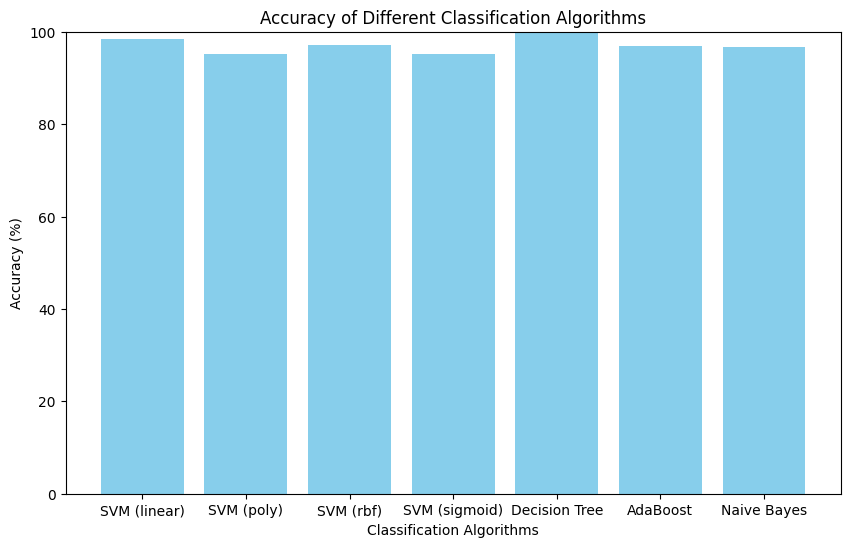

In [104]:
plt.figure(figsize=(10,6))
plt.bar(classifiers.keys(), accuracies, color='skyblue')
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Classification Algorithms')
plt.ylim(0, 100)
plt.show()